<small><img src=https://raw.githubusercontent.com/ia4legos/MachineLearning/main/images/IASAC-UMH.png width="450" height="200"></small>

# <font color="steelblue">Clasificador Naïve Bayes: Algoritmo para múltiples grupos</font>

**Autoría**: 

*   Fernando Borrás (f.borras@umh.es)
*   Federico Botella (federico@umh.es)
*   Inés Hernández (ines.hernandezp@umh.es)
*   Mª Asunción Martínez Mayoral (asun.mayoral@umh.es)
*   Josep Moltó (j.molto@umh.es)
*   Javier Morales (j.morales@umh.es) 

Departamento de Estadística, Matemáticas e Informática. 

Universidad Miguel Hernández de Elche. 


**Financiación**: El material que aparece a continuación se ha desarrollado dentro del marco del proyecto UNIDIGITAL- IASAC.

**Fecha última edición**: 05/03/2023

**Licencia**: <small><a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /></small>

No olvides hacer una copia si deseas utilizarlo. Al usar estos contenidos, acepta nuestros términos de uso y nuestra política de privacidad. 


## <font color="steelblue">Configuración del cuaderno</font>

Para garantizar la funcionalidad completa de este cuaderno, es preciso ejecutar la celda de código a continuación.

In [ ]:
#@title <b><font color="steelblue" size="+1"> Configuración de cuaderno

# Cargamos módulos
from io import StringIO 
import sys
import numpy as np      # importamos numpy como np
import pandas as pd     # importamos pandas como pd
import math             # importamos módulo para cáculos matemáticos

# Esta línea configura matplotlib para mostrar las figuras incrustadas en el jupyter notebook
# Configuraciónde entorno gráfico
%matplotlib inline
import matplotlib.pyplot as plt # importamos matplotlib como plt
import seaborn as sns # importamos seaborn como sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

with Capturing() as output:
    print('Comenzamos....')

with Capturing(output) as output:
    # Librerías
    import os
    !pip install jupyterquiz
    from jupyterquiz import display_quiz
    import json
    import base64
    # Lectura ficheros json
    # A configurar pra cada cuaderno en función de las preguntas de autoevalaución
    for i in range(1,7):
      !wget {f"https://raw.githubusercontent.com/ia4legos/MachineLearning/main/autoeval/auto_50_{i}.json"}
    print("Cuaderno configurado")

if output[-1]=='Cuaderno configurado':
    print(output[-1])
else: 
    print(output[:-2])

Cuaderno configurado


# <font color="steelblue">Introducción</font>

**Descripción:** En este cuaderno se presentan los modelos de clasificación Naïve Bayes para mútiples grupos utilizando la librería Scikit-Learn. Todo ello se ejempifica sobre diferentes ejemplos reales.

**Nivel de Formación:** B

**Recomendaciones antes de usarlo:** Se recomienda haber cursado el cuaderno correspondiente a los modelos de clasificación Naïve Bayes para dos grupos.

## <font color="steelblue">Objetivos de aprendizaje</font>

* Implementar los algoritmos Naïve Bayes para tareas de clasificación de más de dos grupos.
* Realizar el análisis de validación del proceso de clasificación resultante de un algoritmo Naïve Bayes para la tarea de clasificación de más de dos grupos.
* Llevar a cabo el proceso de calibración para estimar de forma efectiva las probabilidades de clasificación de cada grupo. 
* Aplicar los algoritmos Naïve Bayes para la tarea de clasificación de múltiples grupos en situaciones reales. 

## <font color="steelblue">Contenidos</font>

1. Clasificadores Naïve Bayes para mútiples grupos en Scikit-Learn
  * Estimación de probabilidades
  * Calibración de probabilidades
  * Tabla de clasificación
  * Evaluación de la clasificación
2. Aplicaciones

# <font color="steelblue">Clasificadores Naïve Bayes para múltiples grupos en Scikit-Learn</font>

La clasificación para múltiples grupos se lleva a cabo de igual forma que para dos grupos. En la clase `naive_bayes` de Scikit-Learn se encuentran disponibles las funciones:

* `MultinomialNB` para el clasificador multinomial.
* `GaussianNB` para el clasificador Gaussiano (predictoras de tipo numérico).

Además se encuentran disponibles los clasificadores `ComplementNB` y `CategoricalNB`. El primero de ellos es una modificación del clasificador multinomial que es de uso recomendable cuando el número de muestras de cada una de las clases de la respuesta no está equilibrado. Se pueden consultar las ayudas correspondientes en este [enlace](https://scikit-learn.org/stable/modules/naive_bayes.html).

## <font color="steelblue">Estimación de probabilidades</font>

Para obtener las probabilidades a cada una de las clases con la muestra de entrenamiento utilizamos los métodos `predict` y `predict_proba` sobre el modelo de clasificación definido. El método `score` nos proporciona la exactitud del método de clasificación.

## <font color="steelblue">Calibración de probabilidades</font>

Para el estudio de calibración utlizamos la siguiente función contenida dentro de la clase `calibration` de `Scikit-Learn`. La función disponible es:

* `CalibratedClassifierCV` que nos permite realizar la calibración de probabilidades mediante el modelo logístico o el isotónico.


## <font color="steelblue">Tabla de clasificación</font>

La función `confusion_matrix` proporciona la matriz de confusión o tabla de clasificación y `plot_confusion_matrix` la representa gráficamente. Mediante la obtención de esta podemos conocer la cantidad de registros que se han clasificado correctamente y los que no, sabiendo donde se han clasificado estos últimos.

## <font color="steelblue">Evaluación de la clasificación</font>

La matriz de confusión obtenida nos permite obtener la métrica de evaluación típica en un problema de clasificación múltiple: `clasification_report`.

# <font color="steelblue">Aplicaciones</font>

Vamos a llevar a cabo diferentes clasificaciones en las que aplicaremos el clasificador Naïve Bayes Gaussiano. En concreto veremos tres ejemplos donde todas las predictoras son de tipo numérico.  

A continuación cargamos las funciones y módulos necesarios para realizar el proceso de clasificación.

In [ ]:
# Bancos de datos
from sklearn import datasets
# División de muestras
from sklearn.model_selection import train_test_split
# Clasificadores Naïve Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# Métricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Validación
from sklearn.model_selection import cross_val_score, learning_curve
# Calibración de probabilidades
from sklearn.calibration import CalibratedClassifierCV



## <font color="steelblue">Abulones</font>

Esta base de datos, como vimos en cuadernos anteriores, recoge información sobre los abulones y el objetivo es clasificar el abulón según su sexo (`Sex`). Cargamos la base de datos ya preprocesada pues en cuadernos anteriores ya vimos como realizar el preprocesado. Para este ejemplo utilizamos el clasificador Naïve Bayes Gaussiano que es el adecuado cuando disponemos de predictoras de tipo numérico.

In [ ]:
# abalone database
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/abalone_clean.csv'
abalone_clean = pd.read_csv(url, index_col = 0)
abalone_clean.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,M
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,M
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,F
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,M
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,I


Los datos ya están preprocesados y listos para realizar la clasificación. Asignamos a $y$ la variable de clasificación que es `Sex` y a $X$ el resto de variables numéricas.

In [ ]:
# objetivo
y_abalone = abalone_clean['Sex'].astype('category')
# matriz de características
X_abalone = abalone_clean.drop(columns ='Sex')

### División de muestras

Escogemos que la muestra de validación tenga un 30% de los datos y la de entrenamiento un 70%.

In [ ]:
# División de muestras
X_train_abalone, X_test_abalone, y_train_abalone, y_test_abalone = train_test_split(X_abalone, y_abalone, test_size=0.30, random_state=42)

### Predicción, calibración y métricas de clasificación

Una vez tenemos el conjunto de datos dividido en entrenamiento y validación, creamos y entrenamos el clasificador bayesiano. Hemos ajustado los datos a un clasificador Naïve Bayes Gaussiano ya que todas las variables predictoras son numéricas.

In [ ]:
# Ajuste modelo
clasificador_abalone = GaussianNB().fit(X_train_abalone, y_train_abalone)

Realizamos predicciones con el clasificador ajustado sobre el conjunto de validación.

In [ ]:
# Predicciones
y_pred_abalone = clasificador_abalone.predict(X_test_abalone)

Estimamos las probabilidades del clasificador sobre cada una de las clases de la variable objetivo. Tenemos un array con tres columnas donde en la primera tenemos la probabilidad de que la muestra se clasfique como "F", en la segunda la probabilidad de que la muestra se etiquete como "I" y en la tercera tenemos la probabilidad de que la muestra se etiquete como "M". Se asigna la etiqueta en función de la probabilidad más grande para cada una de las muestras de validación.

In [ ]:
# Probabilidades del clasificador
y_prob_abalone = clasificador_abalone.predict_proba(X_test_abalone)

Realizamos un análisis de calibración de las probabilidades obtenidas por el modelo de clasificación para estudiar las posibles distorsiones. Como la curva de calibración solo se puede realizar cuando tenemos una clasificación binaria vamos a utilizar una métrica 

In [ ]:
# Modelos de calibrado

# Isotónico
clf_calibrado_abalone_iso = CalibratedClassifierCV(clasificador_abalone, cv=3, method='isotonic')
clf_calibrado_abalone_iso.fit(X_train_abalone, y_train_abalone)
prob_pos_abalone_iso = clf_calibrado_abalone_iso.predict_proba(X_test_abalone)[:, 1]

# Sigmoide
clf_calibrado_abalone_sig = CalibratedClassifierCV(clasificador_abalone, cv=3, method='sigmoid')
clf_calibrado_abalone_sig.fit(X_train_abalone, y_train_abalone)
prob_pos_abalone_sig = clf_calibrado_abalone_sig.predict_proba(X_test_abalone)[:, 1]


In [ ]:
print(classification_report(y_test_abalone, clf_calibrado_abalone_iso.predict(X = X_test_abalone)))

              precision    recall  f1-score   support

           F       0.47      0.29      0.36       377
           I       0.67      0.79      0.72       419
           M       0.46      0.54      0.50       458

    accuracy                           0.54      1254
   macro avg       0.53      0.54      0.53      1254
weighted avg       0.53      0.54      0.53      1254



In [ ]:
print(classification_report(y_test_abalone, clf_calibrado_abalone_sig.predict(X = X_test_abalone)))

              precision    recall  f1-score   support

           F       0.46      0.43      0.44       377
           I       0.66      0.81      0.72       419
           M       0.45      0.38      0.41       458

    accuracy                           0.54      1254
   macro avg       0.52      0.54      0.53      1254
weighted avg       0.52      0.54      0.53      1254



En el informe resumen de métricas correspondiente al modelo calibrado podemos observar que el mejor modelo corresponde al de la calibración isotónica pero la diferencia es inapreciable.

Obtenemos los valores de exactitud asociados tanto a la muestra de entrenamiento como a la de validación. Esto nos ayudará a hacernos una idea sobre como será la clasificación.

In [ ]:
# clasificación muestras de entrenamiento
print('La exactitud en el conjunto de entrenamiento es: %.3f' % (
    np.round(clasificador_abalone.score(X_train_abalone, y_train_abalone),2)))
# clasificación muestras de validación
print('La exactitud en el conjunto de validación es: %.3f' % (
    np.round(clasificador_abalone.score(X_test_abalone, y_test_abalone),2)))

La exactitud en el conjunto de entrenamiento es: 0.510
La exactitud en el conjunto de validación es: 0.520


La exactitud para ambos conjuntos es muy baja, de hecho tan solo una de cada dos clasificaciones se realiza de forma adecuada. Procedemos a analizarlo de forma gráfica.

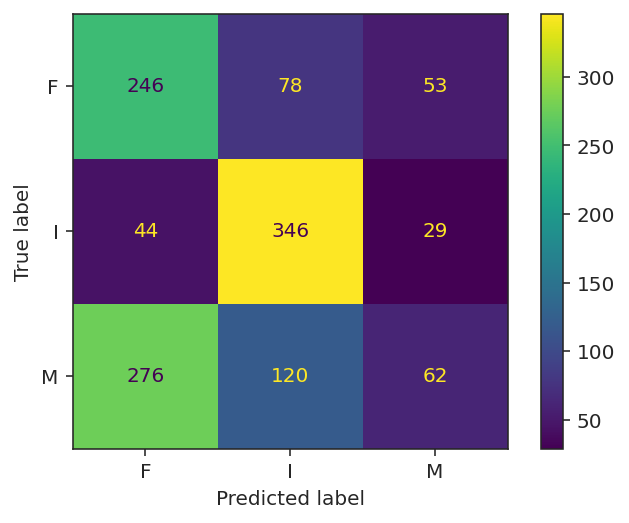

In [ ]:
# Matriz de confusión
cm_abalone = confusion_matrix(y_test_abalone, y_pred_abalone, labels = clasificador_abalone.classes_)
# Solución gráfica
disp_abalone = ConfusionMatrixDisplay(confusion_matrix=cm_abalone, display_labels=clasificador_abalone.classes_)
# Representamos
disp_abalone.plot();

Como habíamos comentado anteriormente, la clasificación que realiza el algortimo entrenado es bastante mala, pues tan solo 654 de 1254 muestras se clasifican correctamente.

Obtenemos el informe de clasificación del modelo.

In [ ]:
print(classification_report(y_test_abalone, y_pred_abalone))

              precision    recall  f1-score   support

           F       0.43      0.65      0.52       377
           I       0.64      0.83      0.72       419
           M       0.43      0.14      0.21       458

    accuracy                           0.52      1254
   macro avg       0.50      0.54      0.48      1254
weighted avg       0.50      0.52      0.47      1254



La categoría que mayor precisión tiene a la hora de clasificar las muestras es "I" pero aún siendo la mayor esta es baja. Las métricas de clasificación tienen valores muy bajos con lo que el modelo obtenido no permite discriminar de forma adecuada entre los abulones de sexo femenino, masculino e infantiles en función de las predictoras consideradas.

### Validación del modelo

Una vez visto el funcionamiento del clasificador procedemos a validarlo mediante las técnicas habituales. En primer lugar utilizaremos los procedimientos de validación cruzada para estudiar la estabilidad de la solución, y después obtendremos las curvas de aprendizaje para ver como evoluciona la bondad del clasificador en función de los tamaños de las muestras de entrenamiento y validación.

Dividimos en 10 muestras de validación y utilizamos la exactitud para medir la bondad de dicho clasificador.

In [ ]:
# Obtenemos los scores de validación
score_val_abalone = pd.DataFrame(cross_val_score(clasificador_abalone, X_train_abalone, y_train_abalone, cv=10, 
                                         scoring ='accuracy'), columns=['score'])
# Describios los valores obtenidos
score_val_abalone.describe().T

,count,mean,std,min,25%,50%,75%,max
score,10.0,0.503254,0.013767,0.484642,0.494007,0.497434,0.516682,0.523973


La exactitud media se sitúa en el 50.33% y no se observa mucha dispersión ya que entre el valor mínimo y máximo hay una diferencia del 4% aproximadamente. El clasificador proporciona malos resultados ya que solo uno de cada dos abulones se clasifica correctamente. Se observa un poco de inestabilidad debida a la muestra de entrenamiento utilizada. Ahora estudiamos la curva de aprendizaje correspondiente a este modelo.

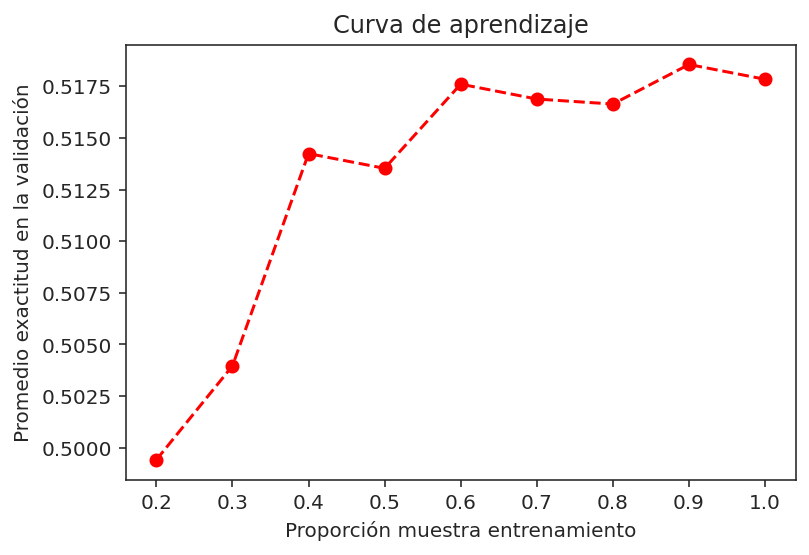

In [ ]:
#Fijamos tamaños de muestra de entrenamiento
size = np.linspace(0.2, 1, 9)
# Evaluamos la exactitud para los diferentes tamaños
train_sizes, train_scores, test_scores = learning_curve(
    clasificador_abalone, X_abalone, y_abalone, train_sizes=size, scoring="accuracy", cv=10)
# Representamos gráficamente
plt.plot(size, test_scores.mean(1), "o--", color="r", label="Validación")
plt.xlabel("Proporción muestra entrenamiento")
plt.ylabel("Promedio exactitud en la validación")
plt.title("Curva de aprendizaje")
plt.show()

La evolución de la curva de aprendizaje es muy pequeña ya que varía de 0.5 a 0.52 aproximadamente. La exactitud obtenida es muy baja.

Por todo lo que hemos obtenido hasta ahora podemos afirmar que el clasificador Naïve Bayes Gaussiano que hemos ajustado no clasifica de forma precisa el conjunto de abulones.

## <font color="steelblue">Reconocimiento de vino</font>

En este ejemplo vamos a tratar de clasificar un conjunto de muestras de vino italiano de tres tipos en función de las variables predictoras. Leemos la base de datos ya preprocesada y realizamos la clasificación.

In [ ]:
# vinos
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/vinos_clean.csv'
vinos_clean = pd.read_csv(url, index_col = 0)
vinos_clean.columns = ['Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline','Class label']
vinos_clean.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class label
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


Como el objetivo es clasificar el vino en una de las tres clases, asignamos $y$ a la variable `Class label`. Además, las clases de vino son categorías y no tienen ningún sentido numérico por lo que convertimos esta variable en categórica.

In [ ]:
# objetivo
y_vinos = vinos_clean['Class label'].astype('category')
# matriz de características
X_vinos = vinos_clean.drop(columns ='Class label')

### División de muestras

Escogemos que la muestra de validación tenga un 30% de los datos y la de entrenamiento un 70%.

In [ ]:
# División de muestras
X_train_vinos, X_test_vinos, y_train_vinos, y_test_vinos = train_test_split(X_vinos, y_vinos, test_size=0.30, random_state=42)

### Predicción, calibración y métricas de clasificación

Igual que en el ejemplo anterior todas las variables predictoras son numéricas, por lo que ajustaremos el clasificador Naïve Bayes Gaussiano.

In [ ]:
# Ajuste modelo
clasificador_vinos = GaussianNB().fit(X_train_vinos, y_train_vinos)

Obtenemos las predicciones del modelo (etiqueta 1 , 2 o 3) para cada una de las muestras de validación.

In [ ]:
# Predicciones
y_pred_vinos = clasificador_vinos.predict(X_test_vinos)


Estimamos las probabilidades del clasificador sobre cada una de las clases de la variable objetivo.

In [ ]:
# Probabilidades de clasificación
y_prob_vinos = clasificador_vinos.predict_proba(X_test_vinos)

Obtenemos los modelos de calibración.

In [ ]:
# Modelos de calibrado

# Isotónico
clf_calibrado_vinos_iso = CalibratedClassifierCV(clasificador_vinos, cv=3, method='isotonic')
clf_calibrado_vinos_iso.fit(X_train_vinos, y_train_vinos)
prob_pos_vinos_iso = clf_calibrado_vinos_iso.predict_proba(X_test_vinos)[:, 1]

# Sigmoide
clf_calibrado_vinos_sig = CalibratedClassifierCV(clasificador_vinos, cv=3, method='sigmoid')
clf_calibrado_vinos_sig.fit(X_train_vinos, y_train_vinos)
prob_pos_vinos_sig = clf_calibrado_vinos_sig.predict_proba(X_test_vinos)[:, 1]


In [ ]:
print(classification_report(y_test_vinos, clf_calibrado_vinos_iso.predict(X = X_test_vinos)))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
print(classification_report(y_test_vinos, clf_calibrado_vinos_sig.predict(X = X_test_vinos)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



En este caso, en el informe resumen de métricas correspondiente al modelo calibrado podemos observar que el mejor modelo corresponde al de la calibración sigmoide, que muestra una clasificación perfecta.

A continuación, obtenemos la precisión de la clasificación tanto para el conjunto de entrenamiento como para el de validación.

In [ ]:
# clasificación muestras de entrenamiento
print('La exactitud en el conjunto de entrenamiento es: %.3f' % (
    np.round(clasificador_vinos.score(X_train_vinos, y_train_vinos),2)))
# clasificación muestras de validación
print('La exactitud en el conjunto de validación es: %.3f' % (
    np.round(clasificador_vinos.score(X_test_vinos, y_test_vinos),2)))

La exactitud en el conjunto de entrenamiento es: 0.980
La exactitud en el conjunto de validación es: 1.000


La exactitud para ambos conjuntos es muy buena, de hecho en el conjunto de validación se clasifican bien todas las muestras. Como el modelo entrenado se ajusta bien al conjunto de datos vamos a realizar la matriz de confusión y posteriormente la validación de este.

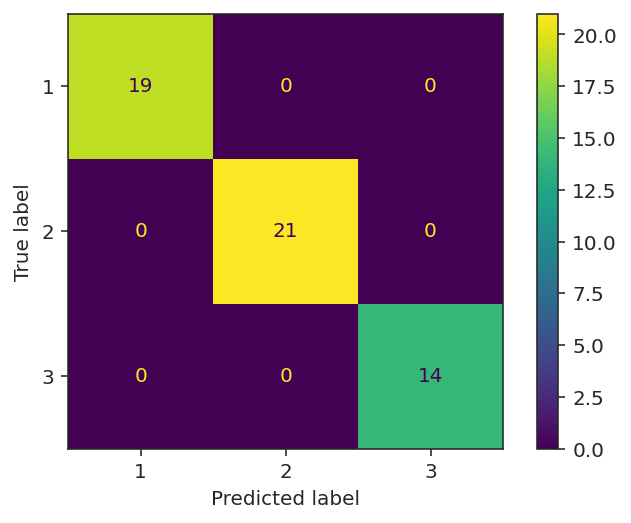

In [ ]:
# Matriz de confusión
cm_vinos = confusion_matrix(y_test_vinos, y_pred_vinos, labels = clasificador_vinos.classes_)
# Solución gráfica
disp_vinos = ConfusionMatrixDisplay(confusion_matrix=cm_vinos, display_labels=clasificador_vinos.classes_)
# Representamos
disp_vinos.plot();

### Validación del modelo

Una vez hemos observado que el modelo clasifica correctamente los vinos en tres grupos debemos asegurarnos de que este es válido. Estudiamos la validez de la clasificación con los mismos métodos que hemos utilizado en el ejemplo anterior.

In [ ]:
# Obtenemos los scores de validación
score_val_vinos = pd.DataFrame(cross_val_score(clasificador_vinos, X_train_vinos, y_train_vinos, cv=10, 
                                         scoring ='accuracy'), columns=['score'])
# Describios los valores obtenidos
score_val_vinos.describe().T

,count,mean,std,min,25%,50%,75%,max
score,10.0,0.959615,0.068379,0.833333,0.9375,1.0,1.0,1.0


En este caso la exactitud media se sitúa en el 95.96% y no se observa prácticamente dispersión ya que entre el valor mínimo y máximo hay una diferencia del 2% aproximadamente. Se observa estabilidad y los valores obtenidos confirman el buen funcionamiento del algoritmo de clasificación. El modelo Naïve Bayes propuesto para clasificar los vinos tiene mucho poder clasificatorio. 

## <font color="steelblue">Dígitos</font>

Este conjunto de datos contiene imágenes de dígitos escritos a mano: 10 clases donde cada clase se refiere a un dígito (del 0 al 9). El objetivo que se persigue es clasificar el dígito escrito según la imagen obtenida. El conjunto de datos no tiene valores faltantes y ya está preparado para su análisis, por lo que no es necesario preprocesarlo.

In [ ]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

### División de muestras

La muestra de validación está compuesta por el 30% de los datos y la de entrenamiento por un 70%.

In [ ]:
# División de muestras
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.3, random_state=0)

### Predicción, calibración y métricas de clasificación

Una vez más las variables predictoras son numéricas, por lo que ajustaremos el clasificador Naïve Bayes Gaussiano.

In [ ]:
# Ajuste modelo
clasificador_digits = GaussianNB().fit(X_train_digits, y_train_digits)

Realizamos predicciones sobre el conjunto de validación. Estas serán valores comprendidos entre el 0 y el 9.

In [ ]:
# Predicciones
y_pred_digits = clasificador_digits.predict(X_test_digits)

Estimamos las probabilidades del clasificador sobre cada una de las clases de la variable objetivo.

In [ ]:
# Probabilidades del clasificador
y_prob_digits = clasificador_digits.predict_proba(X_test_digits)

Obtenemos los modelos de calibración.

In [ ]:
# Modelos de calibrado

# Isotónico
clf_calibrado_digits_iso = CalibratedClassifierCV(clasificador_digits, cv=3, method='isotonic')
clf_calibrado_digits_iso.fit(X_train_digits, y_train_digits)
prob_pos_digits_iso = clf_calibrado_digits_iso.predict_proba(X_test_digits)[:, 1]

# Sigmoide
clf_calibrado_digits_sig = CalibratedClassifierCV(clasificador_digits, cv=3, method='sigmoid')
clf_calibrado_digits_sig.fit(X_train_digits, y_train_digits)
prob_pos_digits_sig = clf_calibrado_digits_sig.predict_proba(X_test_digits)[:, 1]


In [ ]:
print(classification_report(y_test_digits, clf_calibrado_digits_iso.predict(X = X_test_digits)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.84      0.83      0.83        52
           2       0.94      0.83      0.88        53
           3       0.84      0.78      0.81        54
           4       0.94      0.96      0.95        48
           5       0.98      0.89      0.94        57
           6       0.98      0.98      0.98        60
           7       0.88      0.96      0.92        53
           8       0.74      0.87      0.80        61
           9       0.84      0.82      0.83        57

    accuracy                           0.89       540
   macro avg       0.90      0.89      0.89       540
weighted avg       0.89      0.89      0.89       540



In [ ]:
print(classification_report(y_test_digits, clf_calibrado_digits_sig.predict(X = X_test_digits)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.79      0.88      0.84        52
           2       0.97      0.58      0.73        53
           3       0.69      0.85      0.76        54
           4       0.95      0.81      0.88        48
           5       0.98      0.89      0.94        57
           6       0.97      1.00      0.98        60
           7       0.79      0.98      0.87        53
           8       0.63      0.85      0.72        61
           9       0.97      0.58      0.73        57

    accuracy                           0.84       540
   macro avg       0.87      0.84      0.84       540
weighted avg       0.87      0.84      0.84       540



No se observan prácticamente diferencias entre ambos modelos, pero si podemos ver que hay ciertos números que son más difíciles de clasificar como el 3 y el 8 con una precisión del 69% y 63% respectivamente. 

Obtenemos la exactitud de la precisión en el conjunto de entrenamiento y de validación.

In [ ]:
# clasificación muestras de entrenamiento
print('La exactitud en el conjunto de entrenamiento es: %.3f' % (
    np.round(clasificador_digits.score(X_train_digits, y_train_digits),2)))
# clasificación muestras de validación
print('La exactitud en el conjunto de validación es: %.3f' % (
    np.round(clasificador_digits.score(X_test_digits, y_test_digits),2)))

La exactitud en el conjunto de entrenamiento es: 0.860
La exactitud en el conjunto de validación es: 0.820


La exactitud es bastante buena, siendo 86% en la muestra de entrenamiento y 82% en la de validación. Estudiamos la matriz de confusión para tratar de entender donde se producen las mayores confusiones en la clasificación:

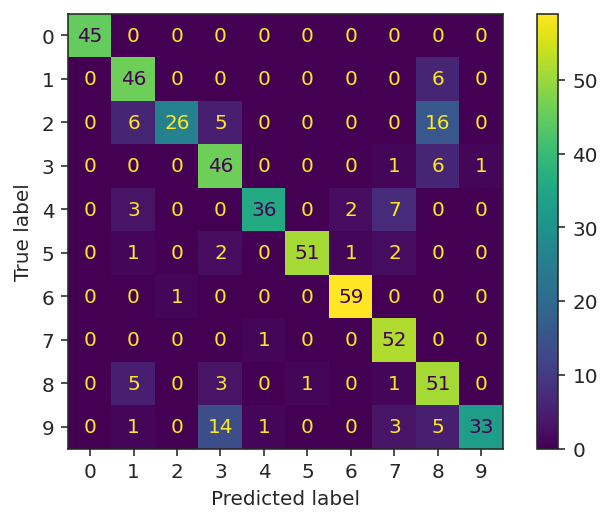

In [ ]:
# Matriz de confusión
cm_digits = confusion_matrix(y_test_digits, y_pred_digits, labels = clasificador_digits.classes_)
# Solución gráfica
disp_digits = ConfusionMatrixDisplay(confusion_matrix=cm_digits, display_labels=clasificador_digits.classes_)
# Representamos
disp_digits.plot();

Del total de imágenes tan solo se clasifican mal 95. Si nos fijamos, las imágenes que más confusión crean a la hora de clasificar los números son en las que aparece un 1, un 3, un 7 y un 8. El número 3 tiende a clasificarlo como si fuera el número 9 y el número 8 lo clasifica como si fuera el 2. Esto se debe claramente a la tipografía usada para representar los números.

Obtenemos el informe de clasificación correspondiente al modelo obtenido.

In [ ]:
print(classification_report(y_test_digits, y_pred_digits))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.74      0.88      0.81        52
           2       0.96      0.49      0.65        53
           3       0.66      0.85      0.74        54
           4       0.95      0.75      0.84        48
           5       0.98      0.89      0.94        57
           6       0.95      0.98      0.97        60
           7       0.79      0.98      0.87        53
           8       0.61      0.84      0.70        61
           9       0.97      0.58      0.73        57

    accuracy                           0.82       540
   macro avg       0.86      0.83      0.82       540
weighted avg       0.86      0.82      0.82       540



Como habíamos contemplado en la matriz de clasificación, los números que tienen una menor precisión en la clasificación son 1, 3, 7 y 8.

### Validación del modelo

Estudiamos la variabilidad y la exactitud mediante un análisis de validación cruzada con 10 bloques.

In [ ]:
# Obtenemos los scores de validación
score_val_digits = pd.DataFrame(cross_val_score(clasificador_digits, X_train_digits, y_train_digits, cv=10, 
                                         scoring ='accuracy'), columns=['score'])
# Describios los valores obtenidos
score_val_digits.describe().T

,count,mean,std,min,25%,50%,75%,max
score,10.0,0.840089,0.025012,0.793651,0.827381,0.840635,0.854302,0.880952


La exactitud media se sitúa en el 84% y se observa dispersión ya que entre el valor mínimo y máximo hay una diferencia del 10% aproximadamente. Aunque el clasificador proporciona buenos resultados, en general vemos cierta inestabildiad debida a la muestra de entrenamiento utilizada. 

# <font color="steelblue">Referencias y enlaces de interés</font>





Manuales

* Aurélien Géron (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems. O’Reilly Media.

* Peters Morgan (2018). Data Analysis From Scratch With Python: Beginner Guide using Python, Pandas, NumPy, Scikit-Learn, IPython, TensorFlow and Matplotlib. AI Sciences LLC.

* Sebastian Raschka, Vahid Mirjalili (2017). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow. Packt Publishing.

* Julian Avila (2017). Scikit-Learn Cookbook: Over 80 Recipes for Machine Learning in Python With Scikit-Learn. Packt Publishing

Enlaces

* Scikit-Learn. Naïve Bayes: https://scikit-learn.org/stable/modules/naive_bayes.html

* Amat, J. (2020). https://www.cienciadedatos.net/documentos/py11-calibrar-modelos-machine-learning.html


* Jake VanderPlas. (2016) https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb#scrollTo=NMlQKNcJSc7s

